<a href="https://colab.research.google.com/github/agargya123/options_pricing_prediction/blob/main/V3_DSO_530_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [ ]:
uploaded = files.upload()

Saving option_train.csv to option_train.csv


In [ ]:
train_data = pd.read_csv(io.BytesIO(uploaded['option_train.csv']))
train_data

,Unnamed: 0,Value,S,K,tau,r,BS
0,1,348.500,1394.46,1050,0.128767,0.0116,Under
1,2,149.375,1432.25,1400,0.679452,0.0113,Under
2,3,294.500,1478.90,1225,0.443836,0.0112,Under
3,4,3.375,1369.89,1500,0.117808,0.0119,Over
4,5,84.000,1366.42,1350,0.298630,0.0119,Under
...,...,...,...,...,...,...,...
4995,4996,325.250,1465.15,1175,0.424658,0.0111,Under
4996,4997,36.000,1480.87,1480,0.101370,0.0111,Over
4997,4998,90.000,1356.56,1500,0.673973,0.0120,Under
4998,4999,175.875,1333.36,1200,0.309589,0.0122,Under


In [ ]:
# Check for missing values
train_data = train_data[['Value','S', 'K', 'r', 'tau']]
missing_values = train_data.isna().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Unnamed: 0    0
Value         0
S             0
K             0
tau           0
r             0
BS            0
dtype: int64


<Figure size 1200x800 with 0 Axes>

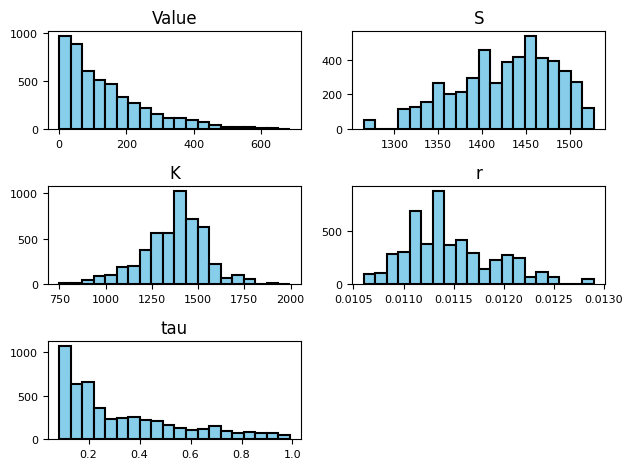

In [ ]:
# Plot histograms for each column
# train_data = train_data[['Value','S', 'K', 'r', 'tau']]
plt.figure(figsize=(12, 8))
train_data.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.5, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout()
plt.show()

In [ ]:
# Standardize the data
train_data = train_data[['Value','S', 'K', 'r', 'tau']]
scaler = StandardScaler()
train_data_standardized = scaler.fit_transform(train_data)

# Convert the standardized array back to a DataFrame
train_data_standardized = pd.DataFrame(train_data_standardized, columns=train_data.columns)

# Display the first few rows of the standardized DataFrame
print("Standardized data:")
train_data_standardized
#---------------------------------------------------------------------------
# from sklearn.preprocessing import RobustScaler

# # Standardize the data using RobustScaler
# scaler = RobustScaler()
# train_data_standardized = scaler.fit_transform(train_data)

# # Convert the standardized array back to a DataFrame
# train_data_standardized = pd.DataFrame(train_data_standardized, columns=train_data.columns)
# train_data_standardized

Standardized data:


,Value,S,K,r,tau
0,1.663569,-0.574242,-1.854747,0.295313,-0.860212
1,0.072383,0.100027,0.172337,-0.373826,1.522042
2,1.232061,0.932380,-0.841205,-0.596872,0.502769
3,-1.094288,-1.012632,0.751504,0.964453,-0.907620
4,-0.450022,-1.074546,-0.117247,0.964453,-0.125387
...,...,...,...,...,...
4995,1.477781,0.687045,-1.130788,-0.819919,0.419805
4996,-0.833585,0.967530,0.635670,-0.819919,-0.978732
4997,-0.402077,-1.250473,0.751504,1.187499,1.498338
4998,0.284141,-1.664419,-0.985997,1.633592,-0.077979


In [ ]:
# # Plot histograms for each column
# train_data = train_data[['Value','S', 'K', 'r', 'tau']]
# plt.figure(figsize=(12, 8))
# train_data_standardized.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.5, xlabelsize=8, ylabelsize=8, grid=False)
# plt.tight_layout()
# plt.show()

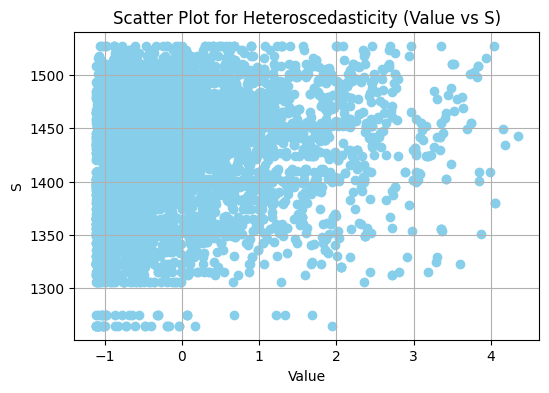

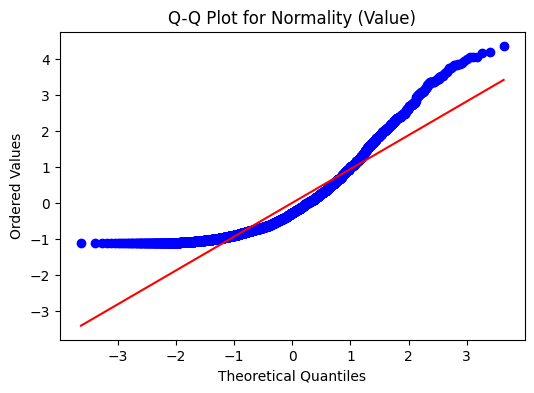

In [ ]:
# Plot heteroscedasticity for 'Value' and 'S'
plt.figure(figsize=(6, 4))
plt.scatter(train_data_standardized['Value'], train_data['S'], color='skyblue')
plt.title('Scatter Plot for Heteroscedasticity (Value vs S)')
plt.xlabel('Value')
plt.ylabel('S')
plt.grid(True)
plt.show()

# Plot normality using Q-Q plot for 'Value'
plt.figure(figsize=(6, 4))
stats.probplot(train_data_standardized['Value'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality (Value)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

In [ ]:
# # Log transform the standardized data
# train_data_log = np.log(train_data)

# # Convert the transformed array back to a DataFrame
# columns_to_transform = ['Value', 'S','K', 'r', 'tau']
# train_data_log = pd.DataFrame(train_data_log, columns=columns_to_transform)

# train_data_log

In [ ]:
# # train_data_log = train_data_log[['Value','S', 'K', 'r', 'tau']]
# plt.figure(figsize=(12, 8))
# train_data_log.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.5, xlabelsize=8, ylabelsize=8, grid=False)
# plt.tight_layout()
# plt.show()

In [ ]:
# Calculate the z-scores for each data point in each column
z_scores = stats.zscore(train_data_standardized)

# Define a threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 3

# Find outliers based on the absolute z-scores exceeding the threshold
outliers = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers
train_data_no_outliers = train_data_standardized[~outliers]

# Display the shape of the DataFrame before and after removing outliers
print("Original shape:", train_data_standardized.shape)
print("Shape after removing outliers:", train_data_no_outliers.shape)

Original shape: (5000, 5)
Shape after removing outliers: (4875, 5)


In [ ]:
X = train_data_no_outliers[['S', 'K', 'r', 'tau']]  # Features
y = train_data_no_outliers['Value']  # Target variable

In [ ]:
# Add constant term for intercept
constant = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, constant).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.685e+04
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        02:06:39   Log-Likelihood:                 123.38
No. Observations:                4875   AIC:                            -236.8
Df Residuals:                    4870   BIC:                            -204.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0180      0.003     -5.329      0.0

In [ ]:
# Initialize and fit Linear Regression model
model1 = LinearRegression().fit(X, y)

# Calculate R-squared
r_squared = model1.score(X, y)

# Print the intercept, coefficients, and R-squared
print("Intercept:", model1.intercept_)
print("Coefficients:", model1.coef_)
print("R-squared:", r_squared)

Intercept: -0.018034360692092327
Coefficients: [ 0.25026553 -0.91444853 -0.0279198   0.27211685]
R-squared: 0.9326181212623342


In [ ]:
# Perform cross-validation
scores = cross_val_score(model1, X, y, cv=5, scoring='r2')

# Print the R-squared scores for each fold
print("R-squared scores for each fold:", scores)

# Calculate and print the mean R-squared score across all folds
print("Mean R-squared:", scores.mean())

R-squared scores for each fold: [0.93416655 0.93529808 0.9404454  0.91587523 0.93369527]
Mean R-squared: 0.9318961048352637


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize and fit Support Vector Regression (SVR) model
model2 = SVR().fit(X, y)

# Predict the target variable
y_pred = model2.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.002704450223375934
Mean Absolute Error: 0.03999278396537563


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Perform cross-validation predictions
y_pred_cv = cross_val_predict(model2, X, y, cv=5)

# Calculate evaluation metrics for each fold
mse_scores = cross_val_score(model2, X, y, cv=5, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(model2, X, y, cv=5, scoring='neg_mean_absolute_error')

# Convert scores to positive values
mse_scores = -mse_scores
mae_scores = -mae_scores

# Calculate R-squared for each fold
r_squared_scores = [r2_score(y, y_pred_cv) for y, y_pred_cv in zip(np.array_split(y, 5), np.array_split(y_pred_cv, 5))]

# Print evaluation metrics and R-squared for each fold
for i in range(5):
    print("Fold", i+1)
    print("Mean Squared Error:", mse_scores[i])
    print("Mean Absolute Error:", mae_scores[i])
    print("R-squared:", r_squared_scores[i])
    print()

Fold 1
Mean Squared Error: 0.0032942241499744457
Mean Absolute Error: 0.043164109007241484
R-squared: 0.9960900250835251

Fold 2
Mean Squared Error: 0.0029911885198637966
Mean Absolute Error: 0.04104825185466726
R-squared: 0.9962782413801019

Fold 3
Mean Squared Error: 0.003303417884872525
Mean Absolute Error: 0.042317645647810494
R-squared: 0.9962821985387608

Fold 4
Mean Squared Error: 0.0032405168680214
Mean Absolute Error: 0.04262120960187349
R-squared: 0.9957078950296615

Fold 5
Mean Squared Error: 0.003238076859905232
Mean Absolute Error: 0.04205529158600609
R-squared: 0.9961276026824929



In [ ]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'X' and 'y' are your feature and target variables, respectively

# Initialize LightGBM model
model = lgb.LGBMRegressor()

# Perform cross-validation with LightGBM
mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Convert scores to positive values
mse_scores = -mse_scores
mae_scores = -mae_scores

# Print mean squared error and mean absolute error for each fold
print("Mean Squared Error:", mse_scores)
print("Mean Absolute Error:", mae_scores)

# Calculate R-squared for each fold
r_squared_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print R-squared for each fold
print("R-squared:", r_squared_scores)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 3900, number of used features: 4
[LightGBM] [Info] Start training from score -0.047106
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 3900, number of used features: 4
[LightGBM] [Info] Start training from score -0.039489
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 3900, number of used features: 4
[LightGBM] [Info] Start training f

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'X' and 'y' are your feature and target variables, respectively

# Initialize Decision Tree model
model = DecisionTreeRegressor()

# Perform cross-validation with Decision Tree
mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Convert scores to positive values
mse_scores = -mse_scores
mae_scores = -mae_scores

# Print mean squared error and mean absolute error for each fold
print("Mean Squared Error:", mse_scores)
print("Mean Absolute Error:", mae_scores)

# Calculate R-squared for each fold
r_squared_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print R-squared for each fold
print("R-squared:", r_squared_scores)


Mean Squared Error: [0.00772202 0.0061234  0.00805326 0.00682326 0.00709882]
Mean Absolute Error: [0.05264281 0.04652338 0.05521885 0.04994999 0.05009085]
R-squared: [0.99114587 0.99252962 0.99111836 0.99113926 0.99238821]


<ipython-input-19-520a7b440dc7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='S', data=train_data, palette='viridis')


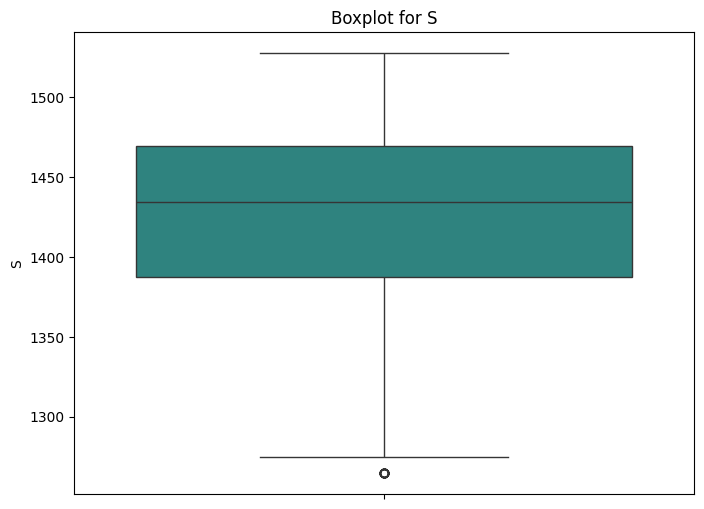

<ipython-input-19-520a7b440dc7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='K', data=train_data, palette='viridis')


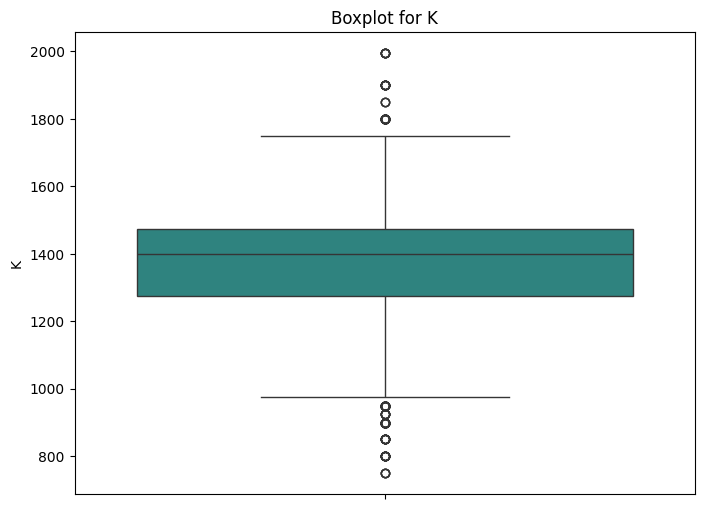

<ipython-input-19-520a7b440dc7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='r', data=train_data, palette='viridis')


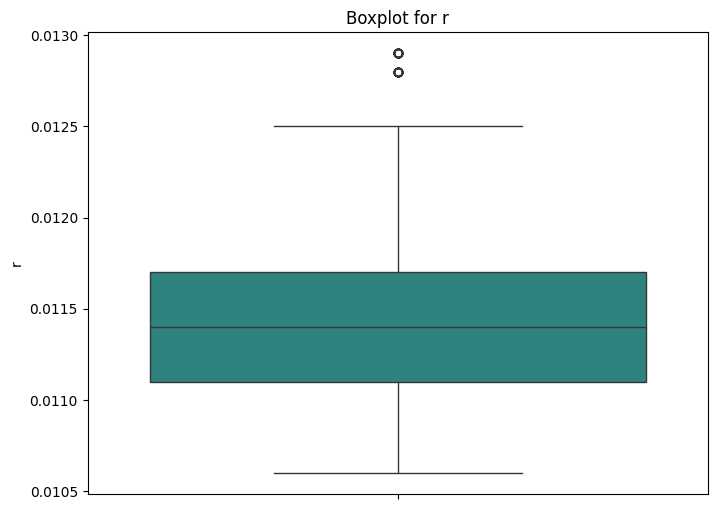

<ipython-input-19-520a7b440dc7>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='tau', data=train_data, palette='viridis')


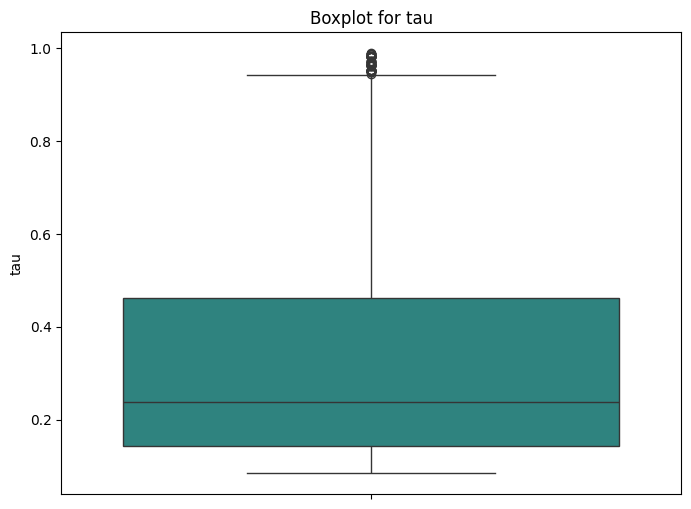

<ipython-input-19-520a7b440dc7>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Value', data=train_data, palette='viridis')


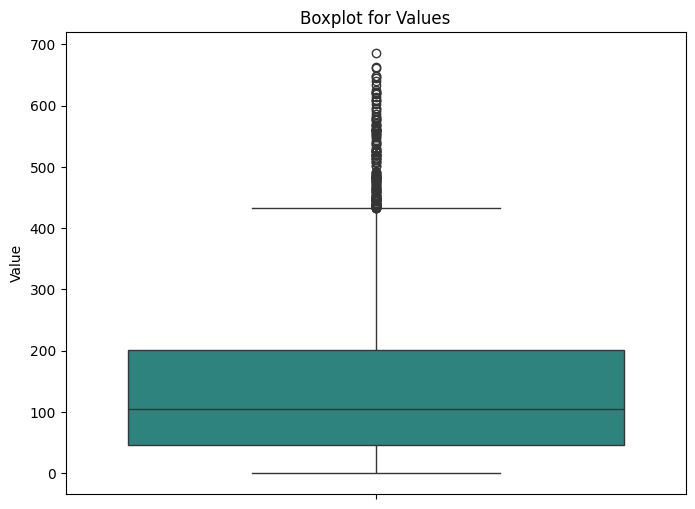

In [ ]:
#Boxplot for Peak Rank

import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='S', data=train_data, palette='viridis')
plt.title('Boxplot for S' )

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y='K', data=train_data, palette='viridis')
plt.title('Boxplot for K' )

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y='r', data=train_data, palette='viridis')
plt.title('Boxplot for r' )

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y='tau', data=train_data, palette='viridis')
plt.title('Boxplot for tau' )

plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(y='Value', data=train_data, palette='viridis')
plt.title('Boxplot for Values' )
plt.show()

In [ ]:
z_scores = np.abs(stats.zscore(train_data[['Value']]))
outlier_indices = np.where(z_scores > 2.5)[0] # z-score of 98% CI is 2.33
len(outlier_indices)

130

In [ ]:
z_scores = np.abs(stats.zscore(train_data[['K']]))
outlier_indices = np.where(z_scores > 2.33)[0] # z-score of 98% CI is 2.33
len(outlier_indices)

169

In [ ]:
z_scores = np.abs(stats.zscore(train_data[['K']]))
outlier_indices = np.where(z_scores > 2.5)[0] # z-score of 98% CI is 2.33
len(outlier_indices)
# Remove outliers
#cleaned_data = train_data.drop(outlier_indices)
#cleaned_data

93

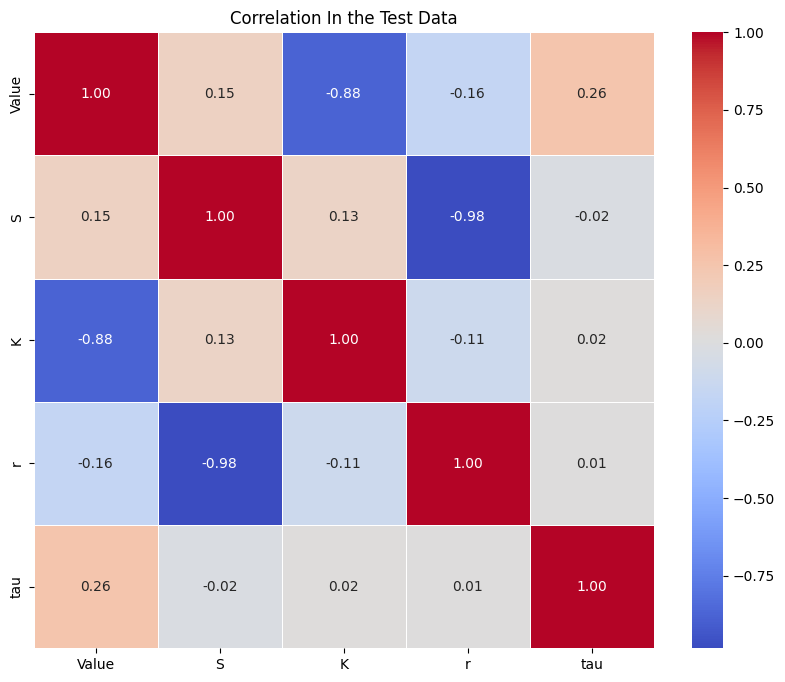

In [ ]:
#X = train_data[['S', 'K', 'r', 'tau']]  # Features
correlation_matrix = train_data[['Value','S', 'K', 'r', 'tau']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation In the Test Data')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

z_scores = np.abs(stats.zscore(train_data[['Value', 'S', 'K', 'r', 'tau']]))
outlier_indices = np.where(z_scores > 2.33)[0] # z-score of 98% CI is 2.33

# Remove outliers
cleaned_data = train_data.drop(outlier_indices)

# Check the shape of the cleaned dataset
print("Shape of cleaned dataset:", cleaned_data.shape)

# Split the dataset into features (X) and target variable (y)
X = cleaned_data[['S', 'K', 'r', 'tau']]
y = cleaned_data['Value']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

summary_with_vif = pd.merge(model.summary().tables[1], vif_data, left_index=True, right_on="Variable", how="left")

# Print summary
#print(model.summary())
print(summary_with_vif)

Shape of cleaned dataset: (4545, 7)


TypeError: Can only merge Series or DataFrame objects, a <class 'statsmodels.iolib.table.SimpleTable'> was passed

In [ ]:
############## chatgpt
from statsmodels.stats.outliers_influence import variance_inflation_factor

z_scores = np.abs(stats.zscore(train_data[['Value', 'S', 'K', 'r', 'tau']]))
outlier_indices = np.where(z_scores > 2.33)[0] # z-score of 98% CI is 2.33

# Remove outliers
cleaned_data = train_data.drop(outlier_indices)

# Check the shape of the cleaned dataset
print("Shape of cleaned dataset:", cleaned_data.shape)

# Split the dataset into features (X) and target variable (y)
X = cleaned_data[['S', 'K', 'r', 'tau']]
y = cleaned_data['Value']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["K"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Convert model summary table to DataFrame
summary_table = pd.DataFrame(model.summary().tables[1])
summary_table.columns = model.summary().tables[1].data[0]

# Merge summary table with VIF data
summary_with_vif = pd.merge(summary_table, vif_data, on="K")

# Print summary with VIF
print(summary_with_vif)


Shape of cleaned dataset: (4545, 7)


KeyError: 'K'

In [ ]:
# Perform k-fold cross-validation
linear_regression = LinearRegression()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features
cv_scores = cross_val_score(linear_regression, X_scaled, y, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-validated R^2 scores:", cv_scores)
print("Mean R^2 score:", np.mean(cv_scores))

Cross-validated R^2 scores: [0.93813825 0.93904628 0.94591304 0.93000797 0.93463753]
Mean R^2 score: 0.9375486165070969


In [ ]:
# Perform Ridge Regression with regularization parameter lambda = 1
ridge_model = Ridge(alpha=13)
ridge_model.fit(X, y)

# Coefficients
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculate in-sample R^2 score
in_sample_predictions = ridge_model.predict(X)
in_sample_r2 = r2_score(y, in_sample_predictions)

print("In-sample R^2 score:", in_sample_r2)

Coefficients: [ 0.00000000e+00  6.19182609e-01 -6.64190365e-01 -2.72526638e-02
  1.38388930e+02]
Intercept: 117.25255165332061
In-sample R^2 score: 0.9375878831495466


In [ ]:
uploaded1 = files.upload()

Saving option_test_nolabel.csv to option_test_nolabel.csv


In [ ]:
test_data = pd.read_csv(io.BytesIO(uploaded1['option_test_nolabel.csv']))
test_data.head()

,Unnamed: 0,S,K,tau,r
0,1,1409.28,1325,0.126027,0.0115
1,2,1505.97,1100,0.315068,0.0110
2,3,1409.57,1450,0.197260,0.0116
3,4,1407.81,1250,0.101370,0.0116
4,5,1494.50,1300,0.194521,0.0110


In [ ]:
test_data.shape

(500, 5)

In [ ]:
# Extract features for test data
X_test_data = test_data[['S', 'K', 'r', 'tau']]

# Add constant term for intercept
X_test_data = sm.add_constant(X_test_data)

# Predictions on the test data
test_predictions = model.predict(X_test_data)

# Print predictions
print(test_predictions)

0      126.872514
1      361.203434
2       53.274176
3      171.074132
4      204.456744
          ...    
495    298.210460
496     -0.768064
497     65.922161
498     92.536426
499    200.028284
Length: 500, dtype: float64


In [ ]:
uploaded2 = files.upload()

Saving group_0_prediction.csv to group_0_prediction.csv


In [ ]:
sample_prediction_data = pd.read_csv(io.BytesIO(uploaded2['group_0_prediction.csv']))
sample_prediction_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Value,BS,NaN,NaN,NaN,NaN,NaN
1,1,0,NaN,NaN,NaN,NaN,NaN
2,2,0,NaN,NaN,NaN,NaN,NaN
3,1,0,NaN,NaN,NaN,NaN,NaN
4,1,0,NaN,NaN,NaN,NaN,NaN
